In [179]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')



## Loading the data & data preprocessing

In [180]:
df=pd.read_csv("/content/train_labeled.csv", delimiter=";")

In [181]:
df.shape

(37637, 26)

In [182]:
df.head()

,ID,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date,value,Label
0,16130,Ford,Ka+,29_24,2018,4,Blue,2017.0,Hatchback,1636,...,Tyre Alignment,0,15,2018-04-15,1,10.749000,0.500000,2018-04-15,7116.045727,0
1,16131,Ford,Edge,29_5,2018,5,Blue,2016.0,SUV,9820,...,Radiator Leaking,0,20,2018-05-20,1,519.900000,2.000000,2018-05-20,22790.624277,0
2,16132,Honda,CR-V,34_3,2018,8,Grey,2012.0,SUV,38500,...,Sensor Malfunction,0,26,2018-08-26,1,3059.099027,2172.572165,2018-08-29,11158.396445,1
3,16133,Ford,Kuga,29_25,2018,5,Silver,2012.0,SUV,43445,...,Gear Box Issue,0,6,2018-05-06,1,571.012064,437.382279,2018-05-25,9492.344018,1
4,16134,Honda,CR-V,34_3,2018,6,Grey,2018.0,SUV,7491,...,Alternator Failing,0,5,2018-06-05,1,479.980000,2.000000,2018-06-05,20903.668754,0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37637 entries, 0 to 37636
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 37637 non-null  int64  
 1   Maker              37637 non-null  object 
 2    Genmodel          37637 non-null  object 
 3    Genmodel_ID       37637 non-null  object 
 4   Adv_year           37637 non-null  int64  
 5   Adv_month          37637 non-null  int64  
 6   Color              37637 non-null  object 
 7   Reg_year           37637 non-null  float64
 8   Bodytype           37637 non-null  object 
 9   Runned_Miles       37637 non-null  int64  
 10  Engin_size         37637 non-null  object 
 11  Gearbox            37637 non-null  object 
 12  Fuel_type          37637 non-null  object 
 13  Price              37637 non-null  float64
 14  Seat_num           37637 non-null  float64
 15  Door_num           37637 non-null  float64
 16  issue              376

In [184]:
df.head()

,ID,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date,value,Label
0,16130,Ford,Ka+,29_24,2018,4,Blue,2017.0,Hatchback,1636,...,Tyre Alignment,0,15,2018-04-15,1,10.749000,0.500000,2018-04-15,7116.045727,0
1,16131,Ford,Edge,29_5,2018,5,Blue,2016.0,SUV,9820,...,Radiator Leaking,0,20,2018-05-20,1,519.900000,2.000000,2018-05-20,22790.624277,0
2,16132,Honda,CR-V,34_3,2018,8,Grey,2012.0,SUV,38500,...,Sensor Malfunction,0,26,2018-08-26,1,3059.099027,2172.572165,2018-08-29,11158.396445,1
3,16133,Ford,Kuga,29_25,2018,5,Silver,2012.0,SUV,43445,...,Gear Box Issue,0,6,2018-05-06,1,571.012064,437.382279,2018-05-25,9492.344018,1
4,16134,Honda,CR-V,34_3,2018,6,Grey,2018.0,SUV,7491,...,Alternator Failing,0,5,2018-06-05,1,479.980000,2.000000,2018-06-05,20903.668754,0


In [185]:
df.describe()

,ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,issue_id,Adv_day,repair_complexity,repair_cost,repair_hours,value,Label
count,37637.000000,37637.000000,37637.000000,37637.000000,37637.000000,3.763700e+04,37637.000000,37637.000000,37637.000000,37637.000000,37637.000000,37637.000000,37637.000000,3.763700e+04,37637.000000
mean,34948.000000,2005.863299,5.678774,2012.381274,47989.454181,1.191580e+04,5.109095,4.342562,0.501395,14.488960,1.280920,307.680224,58.580710,1.132002e+04,0.138959
std,10865.010377,148.989120,2.076881,4.580623,39490.360473,3.337090e+04,1.632467,1.118240,1.136796,8.077964,0.546655,2189.500435,1143.239870,3.170238e+04,0.345908
min,16130.000000,202.000000,1.000000,1960.000000,-19826.000000,1.250000e+02,2.000000,0.000000,0.000000,1.000000,1.000000,-66654.523667,0.500000,1.215327e+02,0.000000
25%,25539.000000,2018.000000,4.000000,2009.000000,15382.000000,3.500000e+03,5.000000,3.000000,0.000000,8.000000,1.000000,25.070000,1.000000,3.330822e+03,0.000000
50%,34948.000000,2018.000000,5.000000,2013.000000,39000.000000,7.350000e+03,5.000000,5.000000,0.000000,15.000000,1.000000,84.250000,2.000000,6.980317e+03,0.000000
75%,44357.000000,2018.000000,7.000000,2016.000000,74000.000000,1.199000e+04,5.000000,5.000000,0.000000,21.000000,1.000000,243.700000,6.000000,1.138890e+04,0.000000
max,53766.000000,2021.000000,13.000000,2019.000000,880000.000000,2.599990e+06,20.000000,6.000000,5.000000,28.000000,4.000000,204334.464171,180985.493395,2.469991e+06,1.000000


In [186]:
Numerical_columns = len(df.describe().columns)
Numerical_columns


15

numerical columns are 14

In [187]:
df.describe(include="O")

,Maker,Genmodel,Genmodel_ID,Color,Bodytype,Engin_size,Gearbox,Fuel_type,issue,breakdown_date,repair_date
count,37637,37637,37637,37637,37637,37637,37637,37637,37637,37637,37636
unique,26,201,203,22,17,55,4,11,90,928,983
top,Ford,Focus,29_14,Black,Hatchback,1.6L,Manual,Petrol,Steering Wheel Shaking,2018-08-26,2018-08-25
freq,18926,3620,3620,5878,20558,8687,30925,21442,2315,300,297


In [188]:
categorical_columns=len(df.describe(include="O").columns)
categorical_columns

11

There are 11 categorical_columns

## Data Cleaning

In [189]:
df.isnull().sum()

,0
ID,0
Maker,0
Genmodel,0
Genmodel_ID,0
Adv_year,0
Adv_month,0
Color,0
Reg_year,0
Bodytype,0
Runned_Miles,0


repair_date column has null value

In [190]:
# Remove rows with null values in 'repair_date'
df = df.dropna(subset=['repair_date'])

In [191]:
df.isnull().sum()

,0
ID,0
Maker,0
Genmodel,0
Genmodel_ID,0
Adv_year,0
Adv_month,0
Color,0
Reg_year,0
Bodytype,0
Runned_Miles,0


There is not any null value in data set

In [192]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df[df.duplicated()]
duplicate_rows

,ID,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date,value,Label


There is not any duplicate value in dataset

In [193]:
df.columns

Index(['ID', 'Maker', ' Genmodel', ' Genmodel_ID', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue',
       'issue_id', 'Adv_day', 'breakdown_date', 'repair_complexity',
       'repair_cost', 'repair_hours', 'repair_date', 'value', 'Label'],
      dtype='object')

###Features Engineering

In [194]:
#creating 'repair_time_days' featutre from  breakdown_date', 'repair_date' columns

# Convert 'breakdown_date' and 'repair_date' to datetime objects
df['breakdown_date'] = pd.to_datetime(df['breakdown_date'])
df['repair_date'] = pd.to_datetime(df['repair_date'])

# Calculate the time difference between breakdown and repair in days
df['repair_time_days'] = (df['repair_date'] - df['breakdown_date']).dt.days

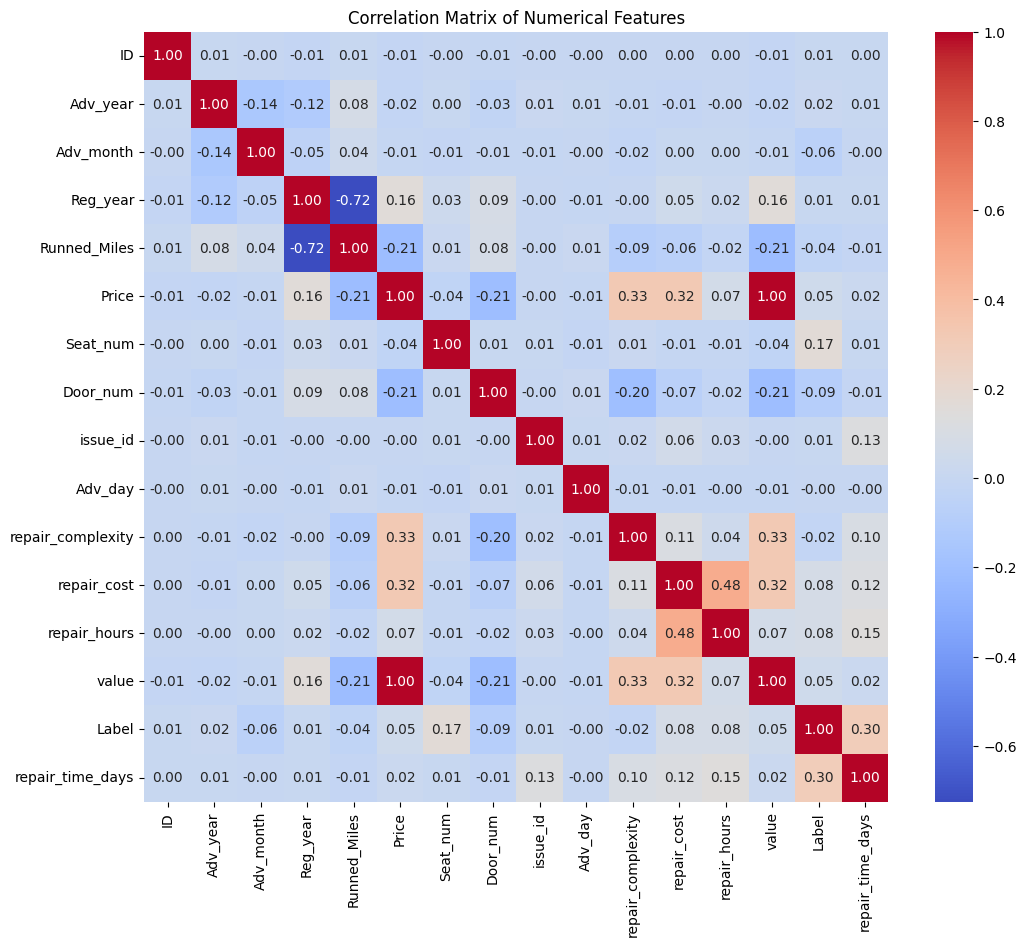

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data manipulation

# Assuming you want to see the correlation between numerical features
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])  # Select columns with numerical data types

correlation_matrix = numerical_df.corr()  # Calculate correlation on numerical data

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [196]:
numerical_features=['Price', 'Seat_num','repair_cost', 'repair_hours', 'value', 'Label']
numerical_features

['Price', 'Seat_num', 'repair_cost', 'repair_hours', 'value', 'Label']

'Price', 'Seat_num', 'repair_cost', 'repair_hours', 'value', 'Label' are highly coorelated features

In [197]:
df.select_dtypes(include ="object")

,Maker,Genmodel,Genmodel_ID,Color,Bodytype,Engin_size,Gearbox,Fuel_type,issue
0,Ford,Ka+,29_24,Blue,Hatchback,1.2L,Manual,Petrol,Tyre Alignment
1,Ford,Edge,29_5,Blue,SUV,2.0L,Manual,Diesel,Radiator Leaking
2,Honda,CR-V,34_3,Grey,SUV,2.2L,Automatic,Diesel,Sensor Malfunction
3,Ford,Kuga,29_25,Silver,SUV,2.0L,Manual,Diesel,Gear Box Issue
4,Honda,CR-V,34_3,Grey,SUV,1.6L,Manual,Diesel,Alternator Failing
...,...,...,...,...,...,...,...,...,...
37632,Citroen,DS4,21_3,Red,Hatchback,2.0L,Manual,Diesel,Starter Motor Issue
37633,Ford,Ranger,29_30,Blue,Pickup,3.2L,Manual,Diesel,Gear Box Issue
37634,Ford,Ka+,29_24,Gelb,Hatchback,1.2L,Manual,Petrol,Steering Wheel Shaking
37635,Bentley,Continental,10_5,Grey,Coupe,4.0L,Automatic,Petrol,Brake Pads Worn


In [198]:
df.select_dtypes(include ="object").columns


Index(['Maker', ' Genmodel', ' Genmodel_ID', 'Color', 'Bodytype', 'Engin_size',
       'Gearbox', 'Fuel_type', 'issue'],
      dtype='object')

In [199]:
df.drop(columns=[' Genmodel_ID'])

,ID,Maker,Genmodel,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,...,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date,value,Label,repair_time_days
0,16130,Ford,Ka+,2018,4,Blue,2017.0,Hatchback,1636,1.2L,...,0,15,2018-04-15,1,10.749000,0.500000,2018-04-15,7116.045727,0,0
1,16131,Ford,Edge,2018,5,Blue,2016.0,SUV,9820,2.0L,...,0,20,2018-05-20,1,519.900000,2.000000,2018-05-20,22790.624277,0,0
2,16132,Honda,CR-V,2018,8,Grey,2012.0,SUV,38500,2.2L,...,0,26,2018-08-26,1,3059.099027,2172.572165,2018-08-29,11158.396445,1,3
3,16133,Ford,Kuga,2018,5,Silver,2012.0,SUV,43445,2.0L,...,0,6,2018-05-06,1,571.012064,437.382279,2018-05-25,9492.344018,1,19
4,16134,Honda,CR-V,2018,6,Grey,2018.0,SUV,7491,1.6L,...,0,5,2018-06-05,1,479.980000,2.000000,2018-06-05,20903.668754,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37632,53762,Citroen,DS4,2018,8,Red,2014.0,Hatchback,60432,2.0L,...,0,25,2018-08-25,2,189.950000,6.000000,2018-08-26,6646.205930,0,1
37633,53763,Ford,Ranger,2018,3,Blue,2013.0,Pickup,68421,3.2L,...,0,27,2018-03-27,1,208.000000,2.000000,2018-03-27,15957.272672,0,0
37634,53764,Ford,Ka+,2018,4,Gelb,2017.0,Hatchback,6832,1.2L,...,0,16,2018-04-16,1,29.263000,1.000000,2018-04-16,8798.418848,1,0
37635,53765,Bentley,Continental,2018,3,Grey,2012.0,Coupe,36500,4.0L,...,0,26,2018-03-26,3,152.475000,6.000000,2018-03-27,61713.600129,0,1


In [200]:
catagorical_features=['Maker', ' Genmodel', 'Color', 'Bodytype', 'Engin_size',
       'Gearbox', 'Fuel_type', 'issue']

 Genmodel_ID' and ' Genmodel' are redandant  so droping Removing  Genmodel_ID'

In [201]:
numerical_features

['Price', 'Seat_num', 'repair_cost', 'repair_hours', 'value', 'Label']

In [202]:
df.columns


Index(['ID', 'Maker', ' Genmodel', ' Genmodel_ID', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue',
       'issue_id', 'Adv_day', 'breakdown_date', 'repair_complexity',
       'repair_cost', 'repair_hours', 'repair_date', 'value', 'Label',
       'repair_time_days'],
      dtype='object')

In [203]:
selected_features=['Maker',' Genmodel','Color','Bodytype','Engin_size','Gearbox','Fuel_type','issue','Price','Seat_num','repair_cost',
 'repair_hours','value','repair_time_days','Label']


In [204]:


df = df[selected_features]

##Feature Encoding

In [205]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through the categorical features and encode them
for feature in catagorical_features:
  df[feature] = label_encoder.fit_transform(df[feature])

# Now your categorical features are encoded numerically
print(df.head())

   Maker   Genmodel  Color  Bodytype  Engin_size  Gearbox  Fuel_type  issue  \
0     18        128      2         6           6        2          7     87   
1     18         84      2        12          14        2          1     82   
2     23         56      9        12          15        0          1     83   
3     18        130     18        12          14        2          1     81   
4     23         56      9        12          10        2          1     30   

     Price  Seat_num  repair_cost  repair_hours         value  \
0   7490.0       5.0    10.749000      0.500000   7116.045727   
1  23995.0       5.0   519.900000      2.000000  22790.624277   
2  11750.0       5.0  3059.099027   2172.572165  11158.396445   
3   9999.0       5.0   571.012064    437.382279   9492.344018   
4  21999.0       5.0   479.980000      2.000000  20903.668754   

   repair_time_days  Label  
0                 0      0  
1                 0      0  
2                 3      1  
3                1

In [206]:
df.head()

,Maker,Genmodel,Color,Bodytype,Engin_size,Gearbox,Fuel_type,issue,Price,Seat_num,repair_cost,repair_hours,value,repair_time_days,Label
0,18,128,2,6,6,2,7,87,7490.0,5.0,10.749000,0.500000,7116.045727,0,0
1,18,84,2,12,14,2,1,82,23995.0,5.0,519.900000,2.000000,22790.624277,0,0
2,23,56,9,12,15,0,1,83,11750.0,5.0,3059.099027,2172.572165,11158.396445,3,1
3,18,130,18,12,14,2,1,81,9999.0,5.0,571.012064,437.382279,9492.344018,19,1
4,23,56,9,12,10,2,1,30,21999.0,5.0,479.980000,2.000000,20903.668754,0,0


In [207]:
df.columns

Index(['Maker', ' Genmodel', 'Color', 'Bodytype', 'Engin_size', 'Gearbox',
       'Fuel_type', 'issue', 'Price', 'Seat_num', 'repair_cost',
       'repair_hours', 'value', 'repair_time_days', 'Label'],
      dtype='object')

##Outlier detection and removal

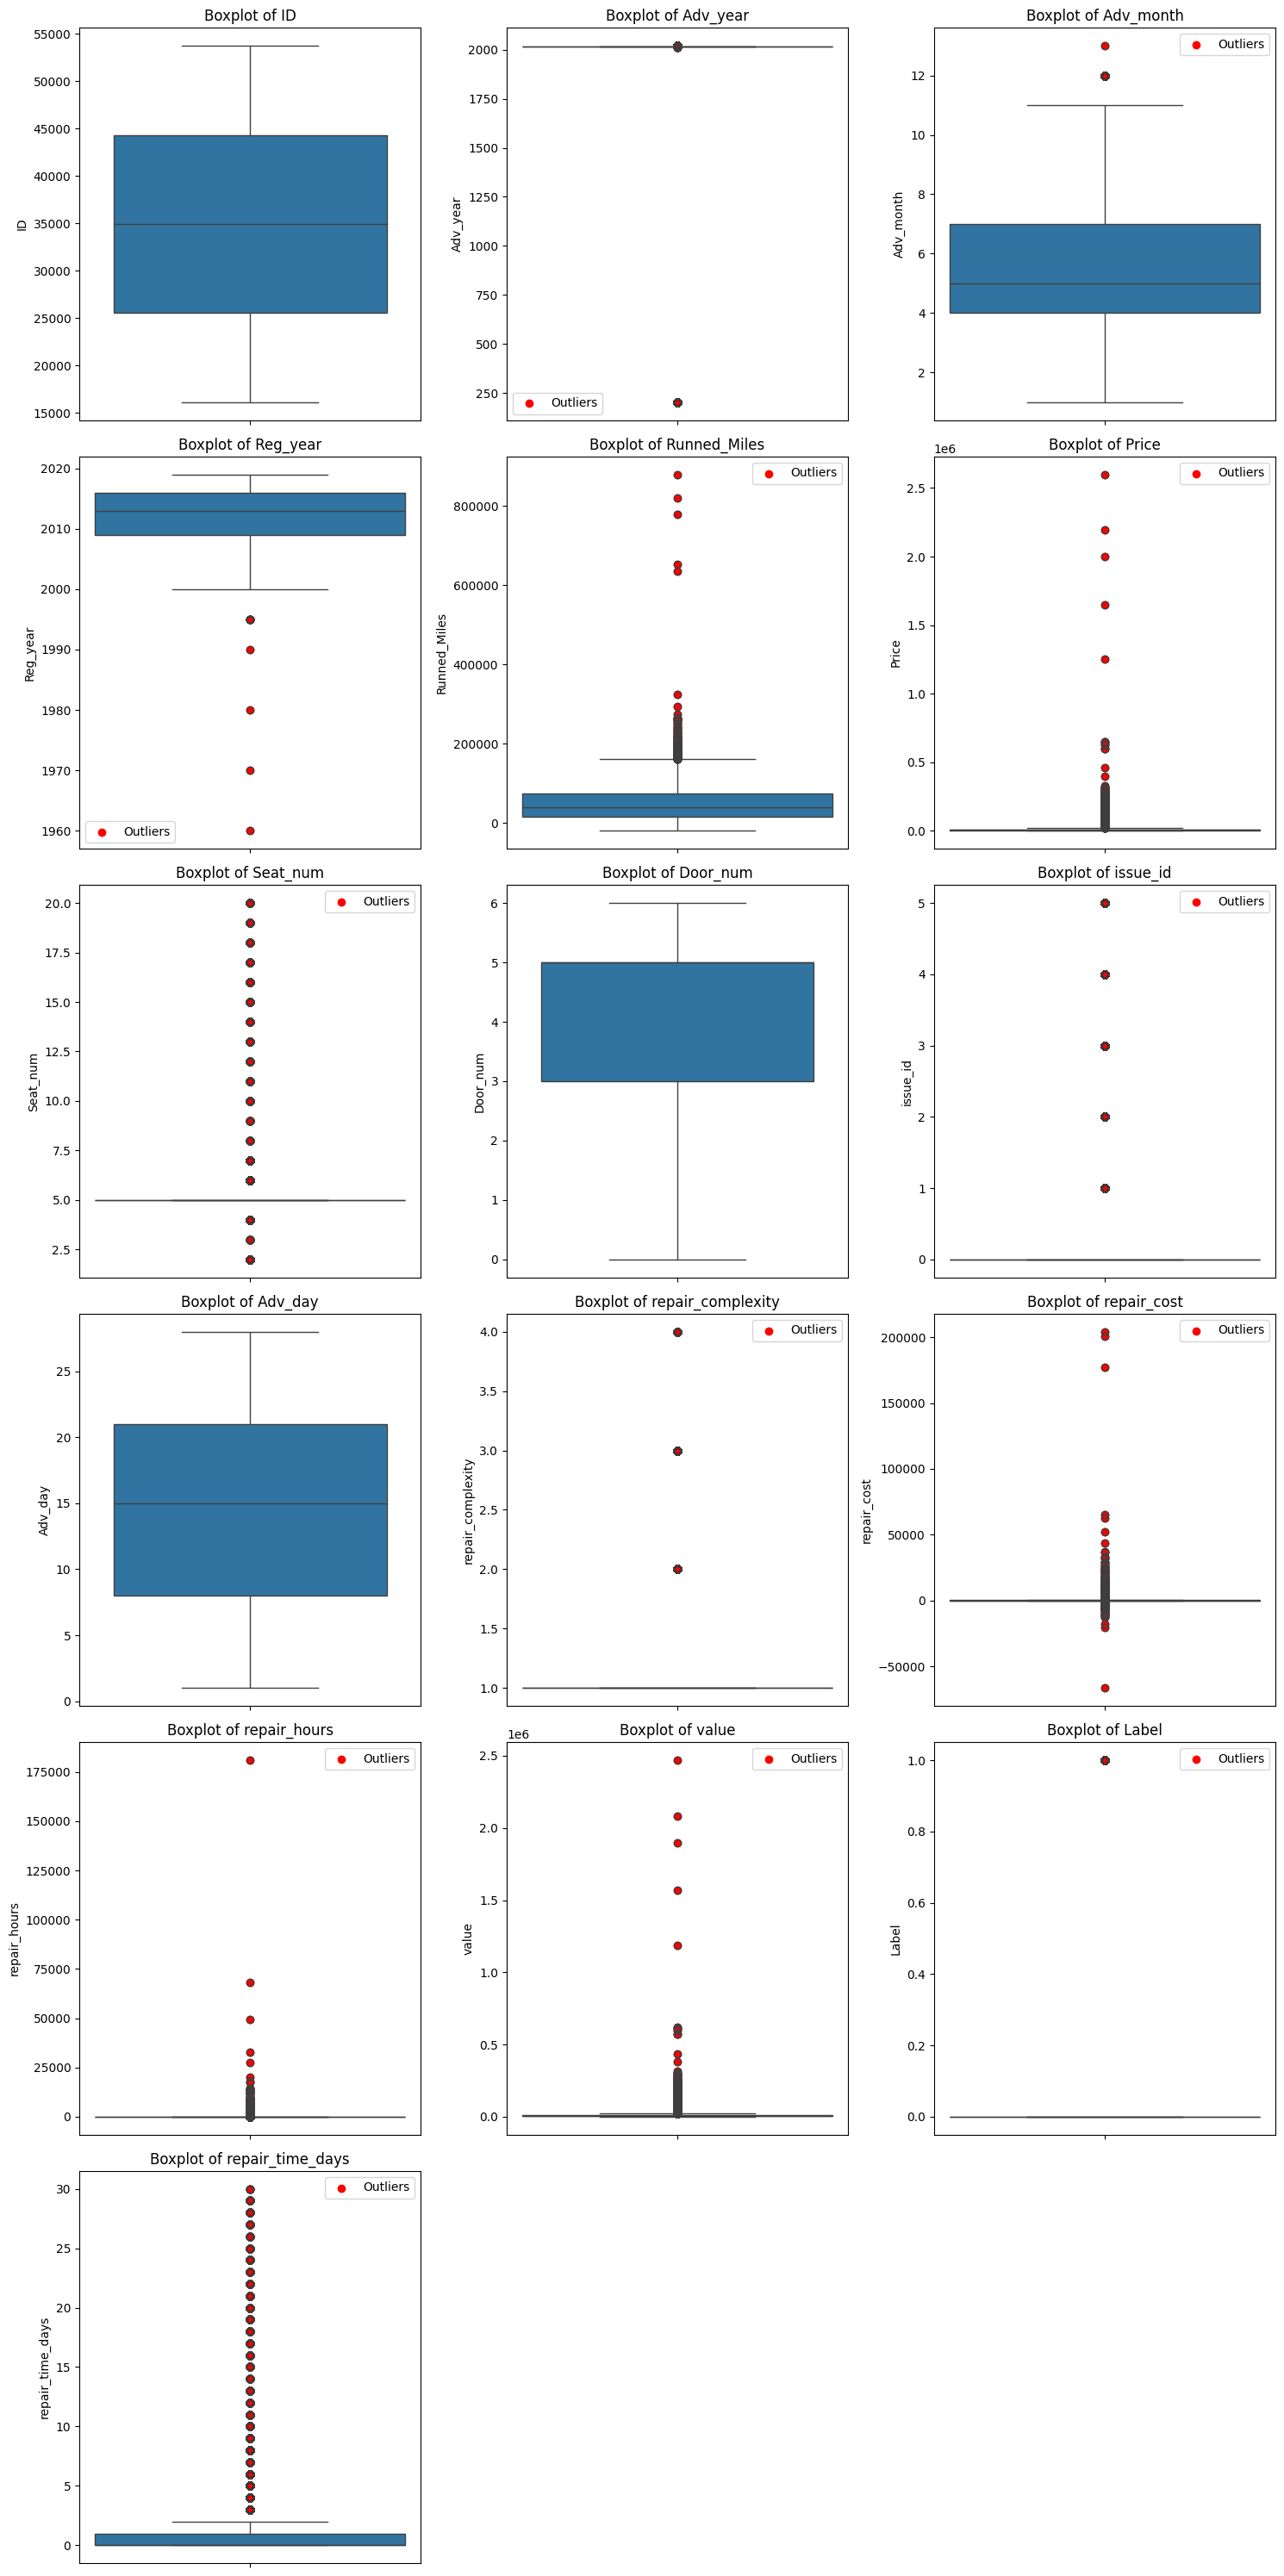

In [208]:
# prompt: detect outliers and plot them in sub plot

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'numerical_df' is your DataFrame with numerical features
def detect_and_plot_outliers(numerical_df):
  """Detects and plots outliers in a DataFrame using boxplots."""

  num_features = len(numerical_df.columns)
  num_rows = (num_features + 2) // 3  # Calculate the number of rows needed for subplots
  fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
  axes = axes.flatten()

  for i, column in enumerate(numerical_df.columns):
      # Calculate quartiles and IQR
      Q1 = numerical_df[column].quantile(0.25)
      Q3 = numerical_df[column].quantile(0.75)
      IQR = Q3 - Q1

      # Define outlier thresholds
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Identify outliers
      outliers = numerical_df[(numerical_df[column] < lower_bound) | (numerical_df[column] > upper_bound)]

      # Create boxplot with outliers highlighted
      sns.boxplot(y=numerical_df[column], ax=axes[i])
      if not outliers.empty:
          axes[i].scatter(x=[0] * len(outliers), y=outliers[column], color='red', marker='o', label='Outliers')
          axes[i].legend()

      axes[i].set_title(f'Boxplot of {column}')

  # Remove any unused subplots
  for i in range(num_features, len(axes)):
      fig.delaxes(axes[i])

  plt.tight_layout()
  plt.show()


# Example usage:
# Assuming 'numerical_df' is your DataFrame containing only numerical features
detect_and_plot_outliers(numerical_df)

In [ ]:
def remove_outliers_iqr(df, columns):
  """Removes outliers from specified columns using the IQR method."""
  for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

# Specify the columns to remove outliers from
columns_to_remove_outliers = ['Maker', 'repair_hours', 'repair_cost', 'Price', 'value']

# Remove outliers from the specified columns
df = remove_outliers_iqr(df, columns_to_remove_outliers)

# Now, 'df' contains the DataFrame with outliers removed from the specified columns.

##  Model Building

In [ ]:
df.head()

In [211]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X = df.drop('Label', axis=1)  # Features (all columns except 'Label')
y = df['Label']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Logistic Regression in this example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
# Calculate the F1-score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Accuracy: 0.9059500959692899
F1-score: 0.03577817531305903


In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train the model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score (if your target variable is binary)
# roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# print(f"AUC-ROC: {roc_auc}")

Accuracy: 0.9366602687140115
Precision: 0.6767676767676768
Recall: 0.6226765799256505
F1-score: 0.648596321393998


In [214]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test data
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.9424184261036468
Precision: 0.6877256317689531
Recall: 0.70817843866171
F1-score: 0.6978021978021978


In [213]:
# prompt: apply decision tree model with accuracy parameters

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model (Decision Tree in this example)
model = DecisionTreeClassifier(random_state=42)  # You can adjust parameters like max_depth, min_samples_split
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9316000697958472
Precision: 0.6414728682170543
Recall: 0.6152416356877324
F1-score: 0.6280834914611005
Accuracy: 0.9316000697958472
Precision: 0.6414728682170543
Recall: 0.6152416356877324
F1-score: 0.6280834914611005


In [172]:
# prompt: apply svm model

from sklearn.svm import SVC

# ... (Your existing code for data preprocessing and feature engineering) ...

# ## Model Building with SVM

X = df.drop('Label', axis=1)  # Features (all columns except 'Label')
y = df['Label']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
model = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, poly)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9000174489617868
Precision: 0.34234234234234234
Recall: 0.07063197026022305
F1-score: 0.11710323574730354


In [173]:
X_train.columns

Index(['Maker', ' Genmodel', 'Color', 'Bodytype', 'Engin_size', 'Gearbox',
       'Fuel_type', 'issue', 'Price', 'Seat_num', 'repair_cost',
       'repair_hours', 'value', 'repair_time_days'],
      dtype='object')

In [215]:
# prompt: create a code to predict the unlabeled dataset using above random forest train model

# Load your unlabeled dataset
unlabeled_df = pd.read_csv("/content/prediction_unlabeled.csv", delimiter=";")  # Replace with your unlabeled data file

# Perform the same preprocessing steps on the unlabeled data as you did on the training data
# (e.g., feature engineering, encoding categorical features, handling missing values)

# Ensure that the unlabeled data has the same columns as your training data (X_train)
# and in the same order.
# You may need to drop or add columns as needed to match the training data.


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through the categorical features and encode them
for feature in catagorical_features:
  unlabeled_df[feature] = label_encoder.fit_transform(unlabeled_df[feature])

# Now your categorical features are encoded numerically
print(unlabeled_df.head())

# Convert 'breakdown_date' and 'repair_date' to datetime objects
unlabeled_df['breakdown_date'] = pd.to_datetime(unlabeled_df['breakdown_date'])
unlabeled_df['repair_date'] = pd.to_datetime(unlabeled_df['repair_date'])

# Calculate the time difference between breakdown and repair in days
unlabeled_df['repair_time_days'] = (unlabeled_df['repair_date'] - unlabeled_df['breakdown_date']).dt.days


# Select the same features that were used to train the model
unlabeled_X = unlabeled_df[X_train.columns]  # Make sure columns match X_train


# Use the trained Random Forest best_rf_classifier to make predictions on the unlabeled data
unlabeled_y_pred = best_rf_classifier.predict(unlabeled_X)


# Add the predicted labels to your unlabeled dataset
unlabeled_df['Label'] = unlabeled_y_pred

# # Save the predicted labels to a file (optional)
# unlabeled_df.to_csv("predicted_labels.csv", index=False)

# You can now analyze the predicted labels or use them for further tasks.
print(unlabeled_df.head())

   ID  Maker   Genmodel  Genmodel_ID  Adv_year  Adv_month  Color  Reg_year  \
0   1      8         97        18_24      2018          6      1    2008.0   
1   2      8         41        18_10      2017          8      2    2011.0   
2   3     16         70        28_12      2018          4      9    2003.0   
3   4     17         29         29_1      2018          3      1    2017.0   
4   5     19         49         34_3      2018          2      2    2002.0   

   Bodytype  Runned_Miles  ...  Door_num  issue  issue_id  Adv_day  \
0         6         98121  ...       5.0     78         1       21   
1         6         29000  ...       5.0     77         2        5   
2         4        142321  ...       5.0     77         2        7   
3         6           320  ...       5.0     77         3       11   
4        10        161000  ...       5.0     80         0        8   

   breakdown_date  repair_complexity  repair_cost  repair_hours  repair_date  \
0      2018-06-21             

In [175]:
unlabeled_df

,ID,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date,value,repair_time_days,Label
0,1,8,97,18_24,2018,6,1,2008.0,6,98121,...,1,21,2018-06-21,2,1138.0000,16.0,2018-06-25,3886.980722,4,1
1,2,8,41,18_10,2017,8,2,2011.0,6,29000,...,2,5,2017-08-05,2,28.9900,1.0,2017-08-05,4270.159395,0,0
2,3,16,70,28_12,2018,4,9,2003.0,4,142321,...,2,7,2018-04-07,1,11.7800,0.5,2018-04-07,841.012246,0,0
3,4,17,29,29_1,2018,3,1,2017.0,6,320,...,3,11,2018-03-11,1,92.4550,1.0,2018-03-11,13765.248112,0,0
4,5,19,49,34_3,2018,2,2,2002.0,10,161000,...,0,8,2018-02-08,1,20.4050,1.0,2018-02-08,1281.014028,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16124,16125,8,44,18_13,202,9,9,2019.0,5,6979,...,0,11,2020-09-11,2,21.0494,1.0,2020-09-11,9971.785602,0,0
16125,16126,17,138,29_31,2018,5,9,2016.0,6,44365,...,0,25,2018-05-25,1,-25.3970,1.0,2018-05-25,17097.587513,0,0
16126,16127,8,43,18_12,2018,3,1,2015.0,5,18000,...,0,21,2018-03-21,2,20.8995,1.0,2018-03-21,8538.111049,0,0
16127,16128,1,59,10_5,2018,8,2,2008.0,2,35859,...,0,28,2018-08-28,3,145.9750,6.0,2018-08-29,49346.647291,1,0


In [218]:
import pandas as pd

# Create a DataFrame with 'ID' and 'Label' columns
data = {'ID': [i for i in range(1, 101)],  # Example IDs from 1 to 100
        'Label': [0] * 100}  # Example Labels (all 0)

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('prediction_labeled.csv', index=False)

In [225]:
df.shape

(100, 2)